In [20]:
# Upload data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image segemntation using threshold values:
Thresholding is a fundamental concept in image processing within the field of computer vision. It involves converting an image into a binary image, where pixels are either classified as foreground (object of interest) or background, based on a certain criterion called a threshold.

 which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold.


 Need:
 The first image, the original image, is a little distorted than the second image we obtained after applying thresholding. So thresholding is useful in extracting text that is not clear in the image.

Image thresholding helps us divide an image’s foreground and background, which can help to identify the objects that are not clearly visible in the images.


Types:
1. Simple
2. Adaptive
3. Multi thresholding

## Simple thresholding and Adaptive thresholding
Simple:
The basic Thresholding technique is Binary Thresholding. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value.


In [21]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray

In [22]:
image = cv2.imread('/content/drive/MyDrive/colabdataset/coin.png')

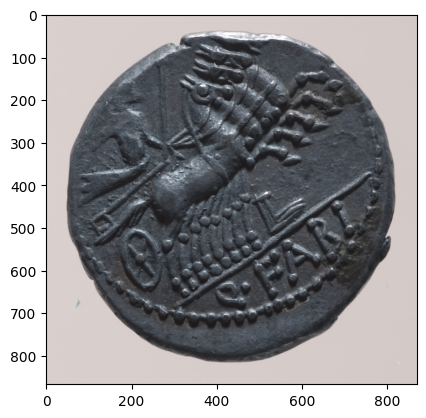

In [23]:
# plot image
plt.imshow(image)

In [24]:
image.shape

(867, 870, 3)

In [25]:
# converting to grayscale
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

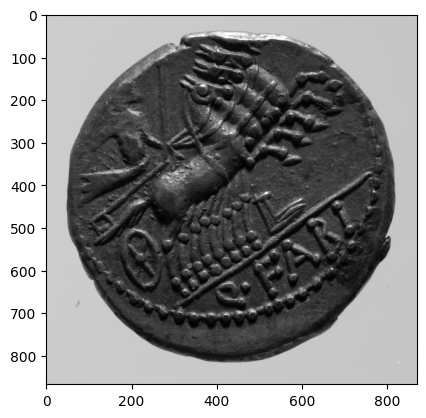

In [26]:
# plot gray scale image
plt.imshow(img,cmap="gray")

In [ ]:
## Simple thresholding
##ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
#cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).

In [ ]:
##plt.imshow(thresh1,cmap='gray')

## Adaptive Thresholding
Both Simple thresholding and Otsu’s thresholding are global thresholding techniques using a single threshold value in image thresholding. But a single threshold value may not be sufficient because it may work well in a certain part of the image but may fail in another part. To resolve these limitations, adaptive thresholding can be used.

Adaptive thresholding is a local thresholding technique. This technique considers each pixel and its neighborhood. The arithmetic mean or Gaussian mean of pixels intensity is commonly used to calculate the threshold of the neighborhood; then the threshold value is used to classify the pixel. In Gaussian mean, pixel value farther from the center of the region contributes less in finding the threshold of the region, while in arithmetic mean, all pixel values contribute equally.

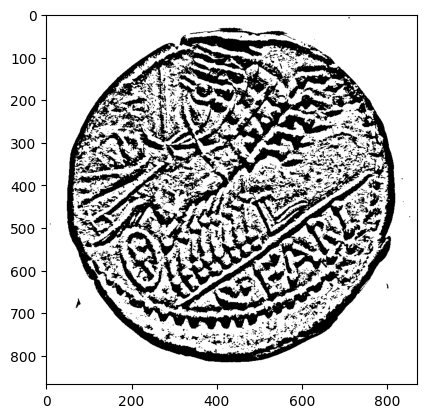

In [27]:
# Arithmatic Mean and gaussioan Adaptive thresholding

thresh6 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,5)
plt.imshow(thresh6,cmap="gray")



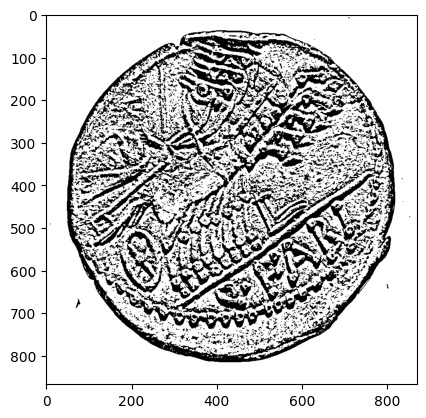

In [28]:
# Gaussian Mean Thresholding

thresh7 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,5)
plt.imshow(thresh7,cmap="gray")

## Adaptive thresholding and  segemented region:
Steps:
- Reads the input image.
- Applies adaptive thresholding to obtain a binary image.
- Detects contours in the binary image using cv2.findContours().
- Draws contours on the original grayscale image.
- Displays the segmented image with contours drawn.
- Returns the segmented image with contours and the number of objects identified.


Contours play a crucial role in image segmentation as they help identify and isolate meaningful objects or regions within an image. In image segmentation, contours are essentially the boundaries that separate one object or region from another

Once contours are detected, they can be used to segment the image into meaningful regions or objects. Each contour represents the boundary of a specific object or region in the image. By isolating the pixels enclosed within these contours, you can segment the image into individual objects or regions.

Number of objects identified: 525


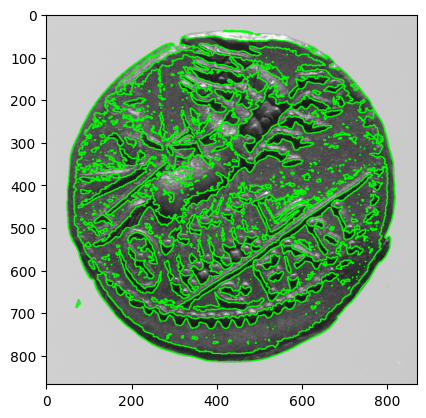

In [31]:
def segment_image(image_path):
    # Read the image
    img = cv2.imread('/content/drive/MyDrive/colabdataset/coin.png',0)

    plt.imshow(img,cmap='gray')
    # Apply Gaussian blur to remove noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 10)

    # Find contours
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on original image
    segmented_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        cv2.drawContours(segmented_img, [contour], -1, (0, 255, 0), 2)

    # Calculate the number of objects
    num_objects = len(contours)

    return segmented_img, num_objects

# Path to the image
image_path = cv2.imread('/content/drive/MyDrive/colabdataset/coin.png',0)

# Perform segmentation and get segmented image and number of objects
segmented_img, num_objects = segment_image(image_path)

# Display segmented image
plt.imshow(segmented_img,cmap="gray")
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the number of objects identified
print("Number of objects identified:", num_objects)

Number of objects identified: 912


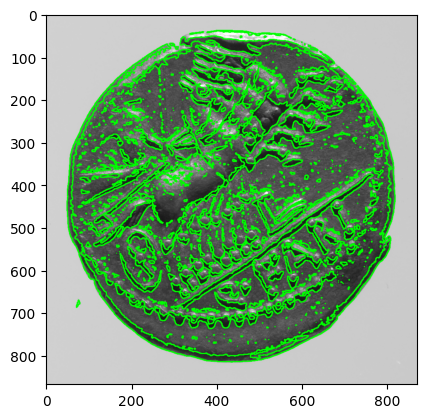

In [34]:
def segment_image(image_path):
    # Read the image
    img = cv2.imread('/content/drive/MyDrive/colabdataset/coin.png',0)

    plt.imshow(img,cmap='gray')
    # Apply Gaussian blur to remove noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 41, 10)

    # Find contours
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on original image
    segmented_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        cv2.drawContours(segmented_img, [contour], -1, (0, 255, 0), 2)

    # Calculate the number of objects
    num_objects = len(contours)

    return segmented_img, num_objects

# Path to the image
image_path = cv2.imread('/content/drive/MyDrive/colabdataset/coin.png',0)

# Perform segmentation and get segmented image and number of objects
segmented_img, num_objects = segment_image(image_path)

# Display segmented image
plt.imshow(segmented_img,cmap="gray")
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the number of objects identified
print("Number of objects identified:", num_objects)